# Make short animations of $\beta Pictoris$ out of the FFIs of TESS

This notebook is based on the tutorial on the MAST archive, which explains the usage of FFI data from TESS. 
https://github.com/spacetelescope/notebooks/blob/master/notebooks/MAST/TESS/beginner_how_to_use_ffi/beginner_how_to_use_ffi.ipynb If you want to learn how to display the full FFI, have a look at it.

(All tutorials can be found on: https://outerspace.stsci.edu/display/TESS/6.0+-+Data+Search+Tutorials)

This notebook shows how one would create the short movies of beta Pic, which can be found in the same repo as this notebook. However, to make it work you would need to download the FFIs of the CCDs, which were used in order to observe the star. That's about 150 GB of data... 

There may be much more efficient ways to do this (by using packages like $lightkurve$ or $eleanor$), but that's the way I did it.

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import os

from astropy.io import fits
from astropy.wcs import WCS

import lightkurve as lk

## Introduction

TESS periodically reads out the entire frame of all four cameras, nominally every 30 minutes, and stores them as full frame images.  Each camera covers ~24x24 degrees on the sky.  These images can be used to construct light curves at 30-minute cadence for any object within the camera's field of view, in contrast to the subset of targets chosen by the mission to be read-out at shorter cadence (nominally two minutes) that receive mission-produced light curves.

This tutorial will refer to a couple TESS-related terms that we define here.
* Sector = TESS observes the sky in regions of 24x96 degrees for approximately 1 month at a time.  Each of these regions is referred to as a "sector", starting with Sector 1.
* HDU = Header Data Unit.  A FITS file is made up of HDUs that contain data and metadata relating to the file. The first HDU is called the primary HDU, and anything that follows is considered an "extension", e.g., "the first FITS extension", "the second FITS extension", etc.
* BJD = Barycentric Julian Date, the Julian Date that has been corrected for differences in the Earth's position with respect to the Solar System center of mass.
* BTJD =  Barycentric TESS Julian Date, the timestamp measured in BJD, but offset by 2457000.0.  I.e., BTJD = BJD - 2457000.0
* WCS = World Coordinate System, A FITS convention used to store coordinate information inside FITS headers.  For TESS full frame images, it is used to provide the translation needed to go from pixel coorindates to celestial coordinates in right ascension and declination.

## Obtaining The Full Frame Images

We will import the FFIs from our local storage. They can be downloaded by using the .txt files in the same repo.

You would need to open a terminal in the directory of the .txt files and type:

```>>> chmod +x file.sh```

```>>> ./file.sh```

And it starts to download the FFIs ... it takes a while (depending on your internet connection).

## Where's $\beta Pictoris$?

Before we make cutouts of the FFIs we have to find out the approximate average position of beta Pic on the CCD during a sector. In order to do so we use the package $lightkurve$ and its functions $estimate$_$centroid$ and take the median value of it. 

In [18]:
tpf = lk.search_targetpixelfile('beta Pictoris', sector=6).download()
#tpf.show_properties()
c, r = tpf.estimate_centroids()
col = np.nanmedian(c)
row = np.nanmedian(r)

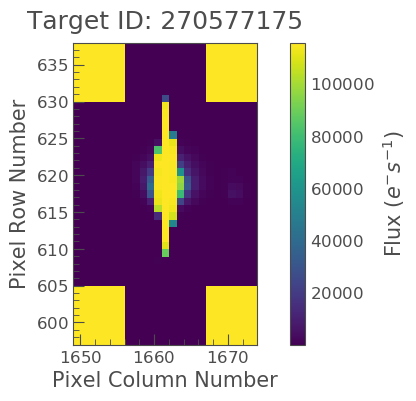

In [19]:
tpf.plot();

In [20]:
col

1661.7014340276476

In [21]:
row

619.4639396240314

In [22]:
tpf.mission

'TESS'

In [23]:
tpf.sector

6

In [24]:
tpf.camera

3

In [25]:
tpf.ccd

3

In [26]:
tpf.show_properties()

   Attribute                                                                            Description                                                                        
--------------- -----------------------------------------------------------------------------------------------------------------------------------------------------------
         camera                                                                                                                                                           3
            ccd                                                                                                                                                           3
         column                                                                                                                                                        1649
            row                                                                                                                             

You can even use $lightkurve$ with the $TESScut$ function in order to create cutouts of a FFI. But we will use the FFI files.

In [27]:
tc = lk.search_tesscut('beta Pictoris', sector=6).download(cutout_size=(60,60))
#It takes a few seconds...

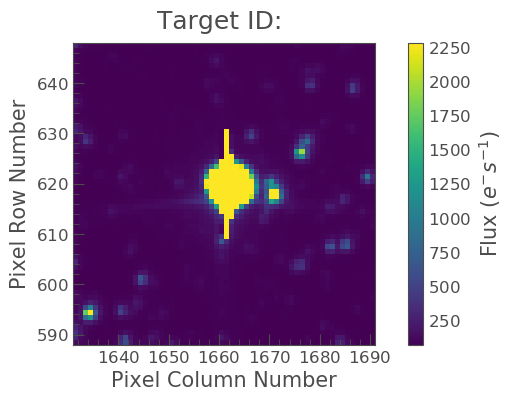

In [28]:
tc.plot();

# Make a movie

In [14]:
fnames = np.sort(glob('s6/*.fits'))

In [15]:
fnames

array(['s6/tess2018349182939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349185939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349192939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349195939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349202939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349205939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349212939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349215939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349222939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349225939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349232939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018349235939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018350002939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018350005939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018350012939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018350015939-s0006-3-3-0126-s_ffic.fits',
       's6/tess2018350022939-s0006-3-3-0126-s_ffic.fits',
       's6/tes

In [16]:
datadir = os.getcwd()
fits_file = [datadir + '/' + i for i in fnames]

In [17]:
datadir

'/home/sebastian/Downloads/TESSbulkdownloads/FFIs'

In [18]:
fits_file[0]

'/home/sebastian/Downloads/TESSbulkdownloads/FFIs/s6/tess2018349182939-s0006-3-3-0126-s_ffic.fits'

In [19]:
len(fits_file)

993

Let's quickly look at the whole first FFI

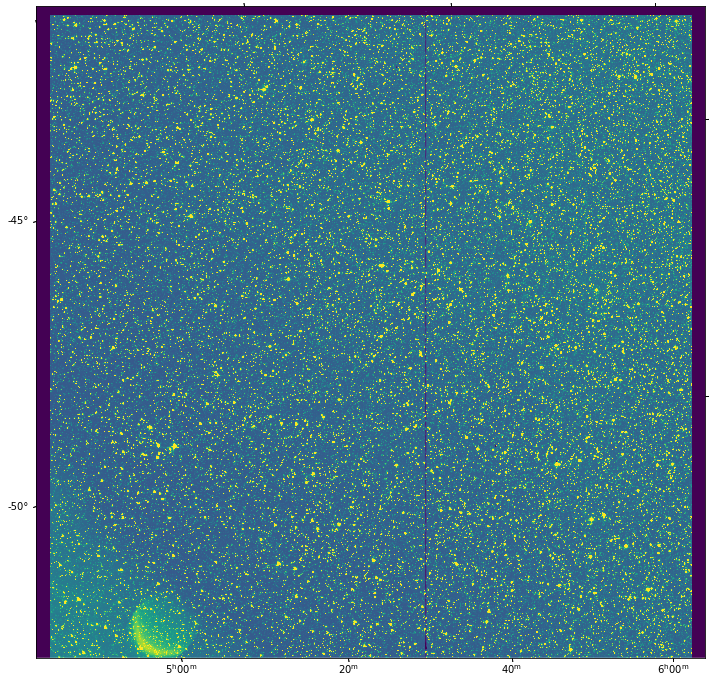

In [104]:
%matplotlib inline
with fits.open(fits_file[-1], mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header
    
#mid_time = (header['TSTOP'] + header['TSTART']) / 2

plt.figure(figsize = (12,12))

plt.subplot(111, projection = wcs_info)
plt.imshow(cal_image, vmin = np.percentile(cal_image,1),vmax = np.percentile(cal_image, 96),origin = "lower")
#plt.xlabel('RA')
#plt.ylabel('Dec')
#plt.title("TESS Calibrated FFI for Sector 1, Camera 4, CCD 2, Timestamp %f BTJD" % mid_time)

#plt.scatter(col, row, c='w')
#
#plt.annotate('beta Pictoris', xy=(col, row), xytext=(3, 1.5),
#            arrowprops=dict(facecolor='black', shrink=0.005))
#
#plt.ylim(row-30, row+30)
#plt.xlim(col-30, col+30)

#cal_image.shape
plt.show()

In [29]:
#The following lines are just a nice looking progress bar.
#Have a look at https://github.com/kuk/log-progress
#If you do not want to use it, remove log_progress() from every loop in the next cell. 

def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

Finally we create a mp4 file for our sector.

The moviemaker was inspired by: https://matplotlib.org/examples/animation/moviewriter.html

In [5]:
sec = 6

fnames = np.sort(glob('s{0}/*.fits'.format(sec)))
datadir = os.getcwd()
fits_file = [datadir + '/' + i for i in fnames]

#Position of beta Pic
tpf = lk.search_targetpixelfile('beta Pictoris', sector=sec).download()
c, r = tpf.estimate_centroids()
col = np.nanmedian(c)
row = np.nanmedian(r)


nr_frames = len(fits_file)

#Save the informations from the header into lists
wcs_info = []
cal_image = []
header = []

for i in log_progress(range(0, nr_frames)):
    hdulist = fits.open(fits_file[i])#, mode = "readonly", memmap=False
    wcs_info.append(WCS(hdulist[1].header))
    cal_image.append(hdulist[1].data)
    header.append(hdulist[1].header)
    hdulist.close()

mid_time = (np.array([i['TSTOP'] for i in header]) + np.array([i['TSTART'] for i in header])) / 2



import matplotlib
matplotlib.use("Agg")
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=30, metadata=metadata)

fig = plt.figure(figsize = (12,12))



with writer.saving(fig, "sector{0}_full.mp4".format(sec), 300):
    
    for j in log_progress(range(0, nr_frames)):

        plt.subplot(111, projection = wcs_info[j])
        
        plt.imshow(cal_image[j], vmin = np.percentile(cal_image[j],50),vmax = np.percentile(cal_image[j], 98),origin = "lower")
        
        #make a 60x60 cutout around beta Pic
        plt.ylim(row-30, row+30)
        plt.xlim(col-30, col+30)
        
        plt.xlabel('RA')
        plt.ylabel('Dec')
        plt.title("TESS Calibrated FFI for Sector {0}, Camera {1}, CCD {2}, Timestamp {3:10.5f} BTJD".format(tpf.sector, tpf.camera, tpf.ccd, mid_time[j]))
        #print('Processed {0} out of {1}...'.format(j, nr_frames))
        #l.set_data(x0, y0)

        writer.grab_frame()